<hr><h1 align="center" style="font-family:Times New Roman;font-size:30px;text-shadow:0 0 10px #00b3ff,
							0 0 40px #00b3ff,
							0 0 80px #00b3ff,
							0 0 120px #00b3ff,
							0 0 200px #00b3ff,
							0 0 300px #00b3ff,
							0 0 400px #00b3ff;">Predicting Hospital Readmission for Patients with Diabetics</h1><hr>
  

<img src="https://revcycleintelligence.com/images/site/article_headers/_normal/hospital%2C_doctor%2C_tests%2C_orders.jpg" style="border-radius:20px;" /><hr>

<img src="Desktop/Team.PNG" style="border-radius:20px;" />

 <h1 align="center" style="color:green;font-family:Arial Black">Data Preprocessing</h1>

### Importing libraries

To start with the model building, first step in the process is to import the required libraries. We are now going to import the required libraries such as numpy, pandas, matplotlib.pyplot and seaborn for our model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and reading the dataset

The dataset namely, 'hospital_new.csv' is imported and read.

In [2]:
dataset=pd.read_csv('hospital_new.csv')

In [3]:
dataset

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,2,0,154,0,0,6,2,58,0,...,0,0,3,1,0,0,0,0,1,0
1,2,0,0,446,0,0,6,1,10,5,...,0,0,1,1,0,0,0,1,1,0
2,3,2,1,3,0,0,6,1,43,1,...,0,0,3,1,0,0,0,0,1,0
3,4,2,1,100,0,0,6,0,50,0,...,0,0,2,1,0,0,0,0,1,0
4,5,2,1,266,1,0,1,2,30,6,...,0,0,2,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,101761,0,1,688,0,2,6,2,50,0,...,0,0,0,1,0,0,0,0,1,0
98048,101762,0,0,376,0,3,4,4,32,3,...,0,0,2,1,0,0,0,1,1,0
98049,101763,2,1,15,0,0,6,0,52,0,...,0,0,0,1,0,0,0,0,1,0
98050,101764,2,0,670,1,2,6,9,44,2,...,0,0,3,1,0,0,0,0,1,0


This dataset contains 43 different columns and 98052 rows in which the last column 'readmitted'(which shows whether a patient is readmitted in a hospital or not) is to be predicted.There are many input columns which effect the prediction such as, age of the patient, time a particular patient has been in hospital, number of lab procedures and other medication procedures undergone by the patient etc., are being listed. 

In [4]:
dataset['race'].unique()

array([2, 0, 4, 1, 3], dtype=int64)

In [5]:
dataset['num_procedures'].unique()

array([0, 5, 1, 6, 2, 3, 4], dtype=int64)

In [6]:
dataset['time_in_hospital'].unique()

array([ 2,  1,  0,  3,  4, 12, 11,  8,  6,  9, 10,  5,  7, 13],
      dtype=int64)

In [7]:
dataset['num_medications'].unique()

array([17, 12, 15,  7, 20, 11, 27, 16, 10, 14, 30,  1, 22, 18,  6, 19, 13,
        9, 21,  8, 26, 24, 31,  5, 29, 25, 23,  3, 32,  4, 38,  2, 28, 60,
        0, 39, 45, 40, 35, 33, 34, 49, 42, 41, 36, 50, 37, 44, 53, 51, 48,
       61, 54, 46, 43, 47, 56, 52, 58, 55, 62, 57, 69, 66, 63, 59, 68, 64,
       67, 65, 74, 73, 72, 70, 71], dtype=int64)

In [8]:
dataset['change'].unique()

array([0, 1], dtype=int64)

In [9]:
#data correlation is done and rounded the values to three decimal places.

dataset.corr().round(3)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
Unnamed: 0,1.000,0.092,0.005,0.002,-0.163,-0.155,-0.112,-0.073,-0.027,-0.022,...,-0.010,-0.020,0.051,0.041,0.003,0.003,0.005,-0.110,0.060,-0.011
race,0.092,1.000,0.067,-0.039,0.103,-0.008,0.010,-0.020,-0.022,0.028,...,0.002,0.001,-0.019,0.010,0.005,0.001,0.001,-0.014,0.003,-0.003
gender,0.005,0.067,1.000,-0.008,0.015,-0.021,-0.006,-0.029,-0.002,0.061,...,0.006,0.009,0.003,0.004,0.007,-0.003,-0.003,-0.015,0.016,-0.003
age,0.002,-0.039,-0.008,1.000,-0.028,0.005,0.031,-0.096,-0.022,-0.067,...,-0.001,0.000,0.018,0.005,-0.000,0.006,0.002,-0.033,0.023,-0.000
admission_type_id,-0.163,0.103,0.015,-0.028,1.000,0.077,0.010,-0.012,-0.141,0.129,...,0.002,0.006,-0.006,-0.002,-0.004,-0.002,0.002,-0.007,0.001,-0.011
discharge_disposition_id,-0.155,-0.008,-0.021,0.005,0.077,1.000,0.012,0.165,0.024,0.014,...,0.006,0.010,-0.022,-0.005,0.000,-0.002,-0.000,0.014,-0.030,0.049
admission_source_id,-0.112,0.010,-0.006,0.031,0.010,0.012,1.000,-0.005,0.085,-0.157,...,0.002,0.003,-0.010,-0.022,0.000,0.001,-0.004,-0.002,0.000,0.007
time_in_hospital,-0.073,-0.020,-0.029,-0.096,-0.012,0.165,-0.005,1.000,0.319,0.191,...,0.004,-0.003,0.047,-0.002,-0.001,-0.003,0.002,-0.108,0.062,0.043
num_lab_procedures,-0.027,-0.022,-0.002,-0.022,-0.141,0.024,0.085,0.319,1.000,0.059,...,0.004,0.000,0.034,-0.010,-0.008,-0.001,-0.003,-0.063,0.032,0.020
num_procedures,-0.022,0.028,0.061,-0.067,0.129,0.014,-0.157,0.191,0.059,1.000,...,-0.004,0.002,0.012,-0.001,-0.005,-0.003,-0.001,-0.005,-0.005,-0.012


In [9]:
type(dataset)

pandas.core.frame.DataFrame

Here we find the type of the dataset 'hospital_new.csv' is pandas dataframe.

In [10]:
dataset.describe()

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,...,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,51115.772610,1.658987,0.461174,362.956339,1.025803,2.716242,4.565659,3.422011,42.147789,1.350712,...,0.000031,0.000388,1.401042,1.006823,0.000133,0.000010,0.000010,0.538225,0.768470,0.112858
std,29307.328017,0.860854,0.498493,170.439332,1.450121,5.174012,3.519851,2.993070,19.709154,1.708475,...,0.005531,0.020194,0.839101,0.083427,0.011514,0.003194,0.003194,0.498539,0.421813,0.316421
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25574.750000,2.000000,0.000000,266.000000,0.000000,0.000000,0.000000,1.000000,30.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,51369.500000,2.000000,0.000000,328.000000,0.000000,0.000000,6.000000,3.000000,43.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,76379.250000,2.000000,1.000000,489.000000,2.000000,3.000000,6.000000,5.000000,56.000000,2.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,101765.000000,4.000000,1.000000,706.000000,7.000000,25.000000,16.000000,13.000000,117.000000,6.000000,...,1.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98052 entries, 0 to 98051
Data columns (total 43 columns):
Unnamed: 0                  98052 non-null int64
race                        98052 non-null int64
gender                      98052 non-null int64
age                         98052 non-null int64
admission_type_id           98052 non-null int64
discharge_disposition_id    98052 non-null int64
admission_source_id         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
number_outpatient           98052 non-null int64
number_emergency            98052 non-null int64
number_inpatient            98052 non-null int64
diag_1                      98052 non-null int64
diag_2                      98052 non-null int64
diag_3                      98052 non-null int64
number_diagnoses            98052 non-null int64
max_glu_s

In [12]:
dataset.shape

(98052, 43)

### Checking for missing values

In [13]:
dataset.isnull().any()

Unnamed: 0                  False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide                 False
pioglitazone  

There are no missing values in the dataset.

In this dataset there are a few unwanted columns that are unique for all the patients and which do not effect the prediction of readmitted patients.Hence columns such as Unnamed: 0, number_outpatient, number_inpatient, number_emergency are dropped from the dataset. 

In [14]:
dataset.drop(['Unnamed: 0','number_outpatient', 'number_inpatient', 'number_emergency','admission_type_id','max_glu_serum','miglitol','troglitazone','tolazamide','nateglinide','chlorpropamide','repaglinide','acetohexamide'],axis = 1,inplace=True)

In [15]:
dataset.corr()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,rosiglitazone,acarbose,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.067074,-0.038533,-0.008028,0.009778,-0.020477,-0.022028,0.027708,0.028482,-0.002890,...,0.004475,0.015223,-0.019249,0.009676,0.004562,0.001265,0.001265,-0.013602,0.002762,-0.003008
gender,0.067074,1.000000,-0.008295,-0.021043,-0.006345,-0.028961,-0.002368,0.061339,-0.022111,-0.044316,...,0.010141,0.011412,0.002786,0.003795,0.007116,-0.002954,-0.002954,-0.015019,0.015742,-0.002544
age,-0.038533,-0.008295,1.000000,0.005368,0.031107,-0.096451,-0.021685,-0.067431,-0.039212,-0.072323,...,0.002390,-0.002043,0.017967,0.005087,-0.000054,0.005959,0.002362,-0.032532,0.022976,-0.000088
discharge_disposition_id,-0.008028,-0.021043,0.005368,1.000000,0.012451,0.164805,0.023552,0.014169,0.107185,-0.012349,...,-0.005946,0.005895,-0.022065,-0.005131,0.000460,-0.001677,-0.000442,0.014404,-0.029608,0.049488
admission_source_id,0.009778,-0.006345,0.031107,0.012451,1.000000,-0.005026,0.084819,-0.156554,-0.070499,0.013014,...,-0.012063,0.000181,-0.009815,-0.021791,0.000163,0.001301,-0.004142,-0.001593,0.000320,0.007403
time_in_hospital,-0.020477,-0.028961,-0.096451,0.164805,-0.005026,1.000000,0.318622,0.191164,0.464243,-0.045009,...,0.006148,0.005781,0.047196,-0.001647,-0.000736,-0.002584,0.001684,-0.108389,0.062335,0.043398
num_lab_procedures,-0.022028,-0.002368,-0.021685,0.023552,0.084819,0.318622,1.000000,0.058675,0.267873,-0.055820,...,-0.007903,-0.000079,0.034410,-0.009570,-0.007682,-0.000834,-0.003265,-0.062856,0.031959,0.019893
num_procedures,0.027708,0.061339,-0.067431,0.014169,-0.156554,0.191164,0.058675,1.000000,0.382975,-0.139711,...,0.011008,-0.001782,0.011880,-0.001476,-0.005475,-0.002525,-0.000656,-0.004592,-0.004686,-0.012470
num_medications,0.028482,-0.022111,-0.039212,0.107185,-0.070499,0.464243,0.267873,0.382975,1.000000,-0.128557,...,0.050179,0.017613,0.080258,0.008673,0.003436,-0.003592,0.001529,-0.246531,0.189339,0.037753
diag_1,-0.002890,-0.044316,-0.072323,-0.012349,0.013014,-0.045009,-0.055820,-0.139711,-0.128557,1.000000,...,0.016865,0.001539,-0.020226,0.008169,0.003376,-0.001649,0.001273,0.011657,-0.006173,-0.001509


<h1 align="center" style="color:green;font-family:Arial Black"> Data Visualization</h1>

By using visual element - graph, we will plot a histogram and few countplots for better analysis of the dataset.

### Histogram for distribution of readmission

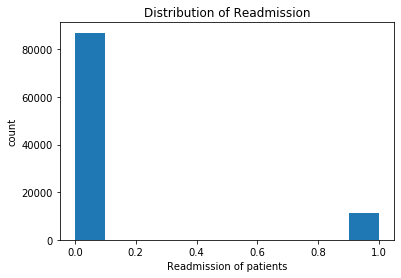

In [16]:
plt.hist(dataset["readmitted"])
plt.title("Distribution of Readmission")
plt.xlabel("Readmission of patients")
plt.ylabel("count")
plt.show()

From this histogram we can infer that, patients who got readmitted after being discharged are very few when compared to patients who didn't get readmitted.

### Countplot - Age of a patient vs Readmission

In [17]:
data = dataset.head(100)
data

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,rosiglitazone,acarbose,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,154,0,6,2,58,0,17,8,...,1,1,3,1,0,0,0,0,1,0
1,0,0,446,0,6,1,10,5,12,1,...,1,1,1,1,0,0,0,1,1,0
2,2,1,3,0,6,1,43,1,15,0,...,1,1,3,1,0,0,0,0,1,0
3,2,1,100,0,6,0,50,0,7,0,...,1,1,2,1,0,0,0,0,1,0
4,2,1,266,0,1,2,30,6,15,0,...,1,1,2,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,392,0,6,2,30,2,10,1,...,1,1,0,1,0,0,0,0,1,0
96,2,1,483,5,6,1,33,0,8,2,...,1,1,1,1,0,0,0,1,0,0
97,4,0,693,0,6,8,95,3,19,0,...,1,1,3,1,0,0,0,0,1,0
98,2,0,277,0,6,2,33,0,10,0,...,1,1,1,1,0,0,0,1,0,0


From the complete dataset we chose first 100 rows of data for better analysis.

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

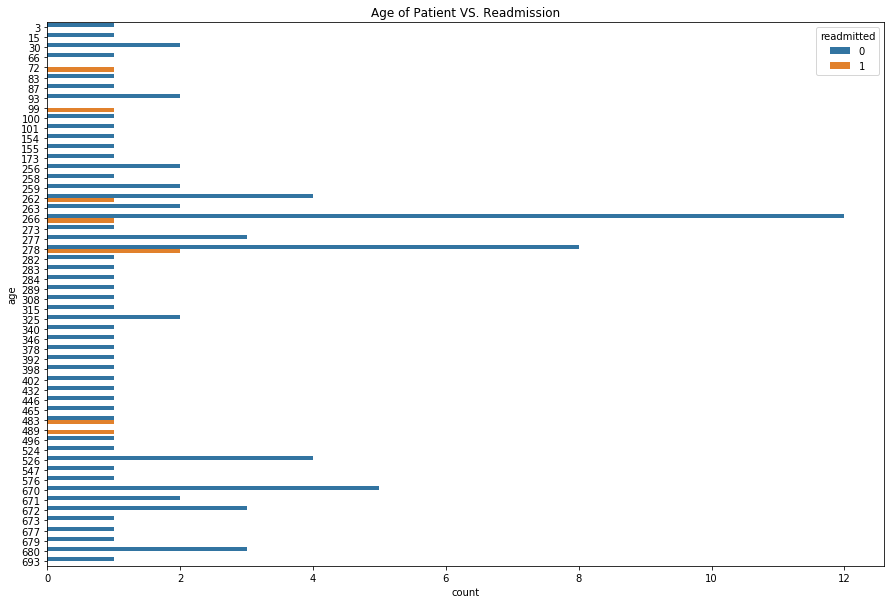

In [18]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

### Countplot - Time in hospital vs Readmission

Text(0.5, 1.0, 'Time in hospital(in days)  VS. Readmission')

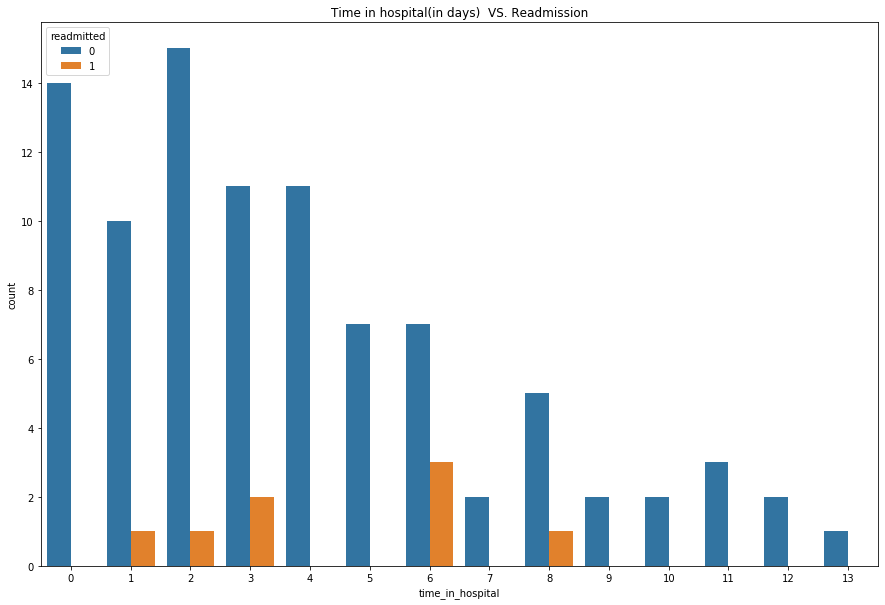

In [19]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x= data['time_in_hospital'], hue = data['readmitted']).set_title('Time in hospital(in days)  VS. Readmission')

### Countplot - Race vs Readmission

Text(0.5, 1.0, 'Race  VS. Readmission')

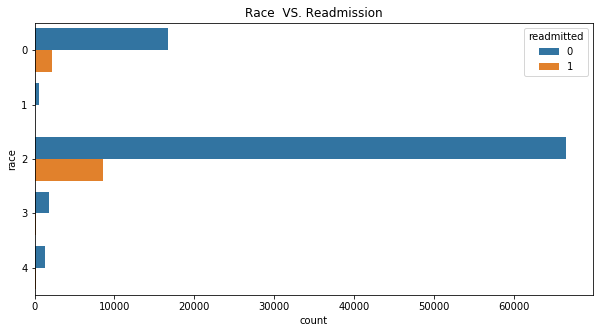

In [20]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y= dataset['race'], hue = dataset['readmitted']).set_title('Race  VS. Readmission')

### Countplot - Gender vs Readmission

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

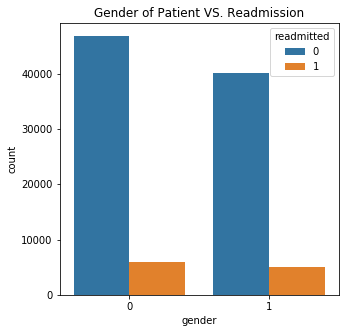

In [21]:
fig = plt.figure(figsize=(5,5))
sns.countplot(dataset['gender'], hue = dataset['readmitted']).set_title("Gender of Patient VS. Readmission")

### Countplot - Prescribed diabetes medication vs Readmission

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

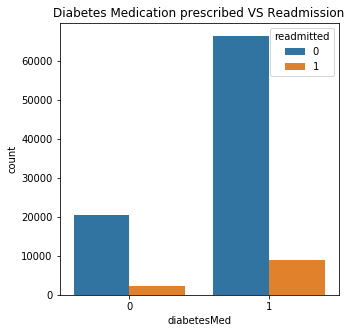

In [22]:
fig = plt.figure(figsize=(5,5))
sns.countplot(dataset['diabetesMed'],hue = dataset['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

In [23]:
dataset.shape

(98052, 30)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98052 entries, 0 to 98051
Data columns (total 30 columns):
race                        98052 non-null int64
gender                      98052 non-null int64
age                         98052 non-null int64
discharge_disposition_id    98052 non-null int64
admission_source_id         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
diag_1                      98052 non-null int64
diag_2                      98052 non-null int64
diag_3                      98052 non-null int64
number_diagnoses            98052 non-null int64
A1Cresult                   98052 non-null int64
metformin                   98052 non-null int64
glimepiride                 98052 non-null int64
glipizide                   98052 non-null int64
glyburide                   98052 non-null int64
tolbutami

<h1 align="center" style="color:green;font-family:Arial Black"> Splitting the dataset</h1>

### Let us split the dataset into input(x) and output(y) variables to train and test the dataset.

In [25]:
data=dataset.head(3000)
data

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,rosiglitazone,acarbose,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,154,0,6,2,58,0,17,8,...,1,1,3,1,0,0,0,0,1,0
1,0,0,446,0,6,1,10,5,12,1,...,1,1,1,1,0,0,0,1,1,0
2,2,1,3,0,6,1,43,1,15,0,...,1,1,3,1,0,0,0,0,1,0
3,2,1,100,0,6,0,50,0,7,0,...,1,1,2,1,0,0,0,0,1,0
4,2,1,266,0,1,2,30,6,15,0,...,1,1,2,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2,0,386,0,6,1,68,1,8,0,...,1,1,1,1,0,0,0,1,0,0
2996,2,1,496,0,13,6,21,0,16,2,...,1,1,0,1,0,0,0,0,1,0
2997,2,1,684,0,6,1,53,3,7,0,...,1,1,2,1,0,0,0,0,1,0
2998,2,1,289,0,0,2,33,3,7,0,...,1,1,2,1,0,0,0,0,1,1


In [26]:
x = data.iloc[:,0:29].values
x

array([[  2,   0, 154, ...,   0,   0,   1],
       [  0,   0, 446, ...,   0,   1,   1],
       [  2,   1,   3, ...,   0,   0,   1],
       ...,
       [  2,   1, 684, ...,   0,   0,   1],
       [  2,   1, 289, ...,   0,   0,   1],
       [  2,   1, 386, ...,   0,   1,   1]], dtype=int64)

In [27]:
y = data.iloc[:,29:].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

<h1 align="center" style="color:green;font-family:Arial Black"> Splitting data into train and test</h1>

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25) 

In [29]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [30]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [31]:
x_train

array([[  2,   0, 325, ...,   0,   0,   1],
       [  2,   0, 278, ...,   0,   1,   1],
       [  0,   1, 286, ...,   0,   0,   1],
       ...,
       [  2,   1, 544, ...,   0,   0,   1],
       [  2,   1, 504, ...,   0,   1,   0],
       [  0,   1, 670, ...,   0,   1,   0]], dtype=int64)

In [32]:
x_test

array([[  2,   1, 278, ...,   0,   1,   1],
       [  2,   0, 695, ...,   0,   1,   1],
       [  2,   1, 377, ...,   0,   0,   1],
       ...,
       [  2,   1, 672, ...,   0,   1,   1],
       [  0,   0, 154, ...,   0,   1,   0],
       [  2,   0, 465, ...,   0,   1,   1]], dtype=int64)

<h1 align="center" style="color:green;font-family:Arial Black"> Finding accuracies</h1>

### Prediction of accuracy using various algorithms like Logistic regression, Decision tree, Random forest and KNN classifier.

<h1 align="center" style="color:darkcyan;font-family:Times New Roman">RANDOM FOREST</h1>

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
#accuracy_rf = accuracy_score(y_pred_rf,y_test)
#accuracy_rf

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
pd.DataFrame(confusion_matrix(y_test,y_pred_rf),columns=["Prediction0","Prediction1"],index=["Actual0","Actual1"])

,Prediction0,Prediction1
Actual0,26009,54
Actual1,3336,17


In [37]:
from joblib import dump
dump(rf,'rf.save')

['rf.save']

In [36]:
y_pred_rf[143]

1

In [39]:
x_train[143]

array([  2,   0, 257,   0,   6,   0,  37,   1,   4,   0,   7, 136,   0,
         2,   1,   1,   2,   1,   0,   1,   1,   1,   1,   1,   0,   0,
         0,   1,   1], dtype=int64)

In [40]:
y_train[143]

array([0], dtype=int64)

In [38]:
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
y_pred_rf[607]

1

In [42]:
x_test[607]

array([  2,   1, 526,   0,  13,   0,  62,   0,   8,   3,  20, 267,   6,
         2,   1,   1,   1,   1,   0,   1,   1,   1,   1,   1,   0,   0,
         0,   1,   0], dtype=int64)

In [43]:
x_train[607]

array([  2,   1, 266,   0,   6,   8,  80,   6,  35,   0,  20, 347,   4,
         0,   1,   0,   1,   1,   0,   1,   1,   1,   2,   1,   0,   0,
         0,   0,   1], dtype=int64)

<h1 align="center" style="color:darkcyan;font-family:Times New Roman"> LOGISTIC REGRESSION ALGORITHM</h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

In [ ]:
x_test

In [ ]:
from joblib import dump
dump(lgr,'lgr.save')

In [ ]:
y_pred=lgr.predict(x_test)

In [ ]:
np.unique(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_lr = accuracy_score(y_test,y_pred)
accuracy_lr

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Prediction0","Prediction1"],index=["Actual0","Actual1"])

In [ ]:
X_DT=np.array([[0.0, 1.0, 72.0, 0.0, 3.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0, 19.0, 0.0, 4.0, 2.0, 1.0, 1.0, 1.0, 3.0, 0.0, 1.0, 1.0, 1.0, 3.0, 0.0, 1.0, 1.0, 1.0, 1.0]])
X_DT_prediction=lgr.predict(X_DT)

In [ ]:
X_DT_prediction

<h1 align="center" style="color:darkcyan;font-family:Times New Roman">KNN CLASSIFIER<h1>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe2=Pipeline([('rescale',StandardScaler()),('classifier',KNeighborsClassifier())])

In [ ]:
pipe2.fit(x_train,y_train)

In [ ]:
y_pred_knn = pipe2.predict(x_test)

In [ ]:
accuracy_knn=accuracy_score(y_test,y_pred_knn)
accuracy_knn

In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred_knn),columns=["Prediction0","Prediction1"],index=["Actual0","Actual1"])

<h1 align="center" style="color:darkcyan;font-family:Times New Roman"> DECISION TREE CLASSIFIER</h1>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best')
dt.fit(x_train,y_train)
y_pred_dtc=dt.predict(x_test)
accuracy_dtc=accuracy_score(y_test,y_pred_dtc)
accuracy_dtc

In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred_dtc),columns=["Prediction0","Prediction1"],index=["Actual0","Actual1"])

<h1 align="center" style="color:darkcyan;font-family:Times New Roman">GAUSSIAN NAIVE BAYES</h1>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe4=Pipeline([('rescale',StandardScaler()),('classifier',GaussianNB())])

In [ ]:
pipe4.fit(x_train,y_train)

In [ ]:
y_pred_nb = pipe4.predict(x_test)

In [ ]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
accuracy_nb

In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred_nb),columns=["Prediction0","Prediction1"],index=["Actual0","Actual1"])

<h1 align="center" style="color:forestgreen;font-family:Times New Roman">Accuracies comparision</h1>

In [ ]:
accuracy = [accuracy_lr,accuracy_knn,accuracy_dtc,accuracy_rf,accuracy_nb]

In [ ]:
a = np.array(accuracy)
a

In [ ]:
plt.hist(a)
plt.title("COMPARING ACCURACIES OF ALGORITHMS")
plt.xlabel("ACCURACY SCORES")
plt.ylabel("VALUES")
plt.show